In [36]:
import gc
import os
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from tqdm import tqdm
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [37]:
# 혹 다른 데이터 셋 추가(Pretrained Model Weights)로 인해 PATH가 변경된다면 아래 PATH를 수정
DATA_PATH = '/content/drive/MyDrive/강의및특강/2024_메디컬IoT/input'
os.listdir(DATA_PATH)

['class.csv', 'train.csv', 'train']

In [38]:
# 이미지 폴더 경로
TRAIN_IMG_PATH = os.path.join(DATA_PATH, 'train')
#TEST_IMG_PATH = os.path.join(DATA_PATH, 'test')

# CSV 파일 경로
df_train = pd.read_csv(os.path.join(DATA_PATH, 'train.csv'))
#df_test = pd.read_csv(os.path.join(DATA_PATH, 'test.csv'))
df_class = pd.read_csv(os.path.join(DATA_PATH, 'class.csv'))
df_train

,img_file,bbox_x1,bbox_y1,bbox_x2,bbox_y2,class
0,train_00001.jpg,1,80,641,461,108
1,train_00002.jpg,57,53,293,236,71
2,train_00003.jpg,35,42,227,160,76
3,train_00004.jpg,10,21,254,165,188
4,train_00005.jpg,1,67,772,573,44
...,...,...,...,...,...,...
1995,train_01996.jpg,75,192,609,422,48
1996,train_01997.jpg,1,86,585,475,161
1997,train_01998.jpg,57,158,351,296,103
1998,train_01999.jpg,18,12,251,183,131


In [39]:
print("타겟 클래스 총 갯수 : {}".format(df_class.shape[0]))
print("Train Data의 타겟 종류 갯수 : {}".format(df_train['class'].nunique()))

타겟 클래스 총 갯수 : 196
Train Data의 타겟 종류 갯수 : 196


In [40]:
df_train.value_counts('class')

,count
class,
65,19
8,18
110,17
108,16
80,16
...,...
176,5
175,5
158,5


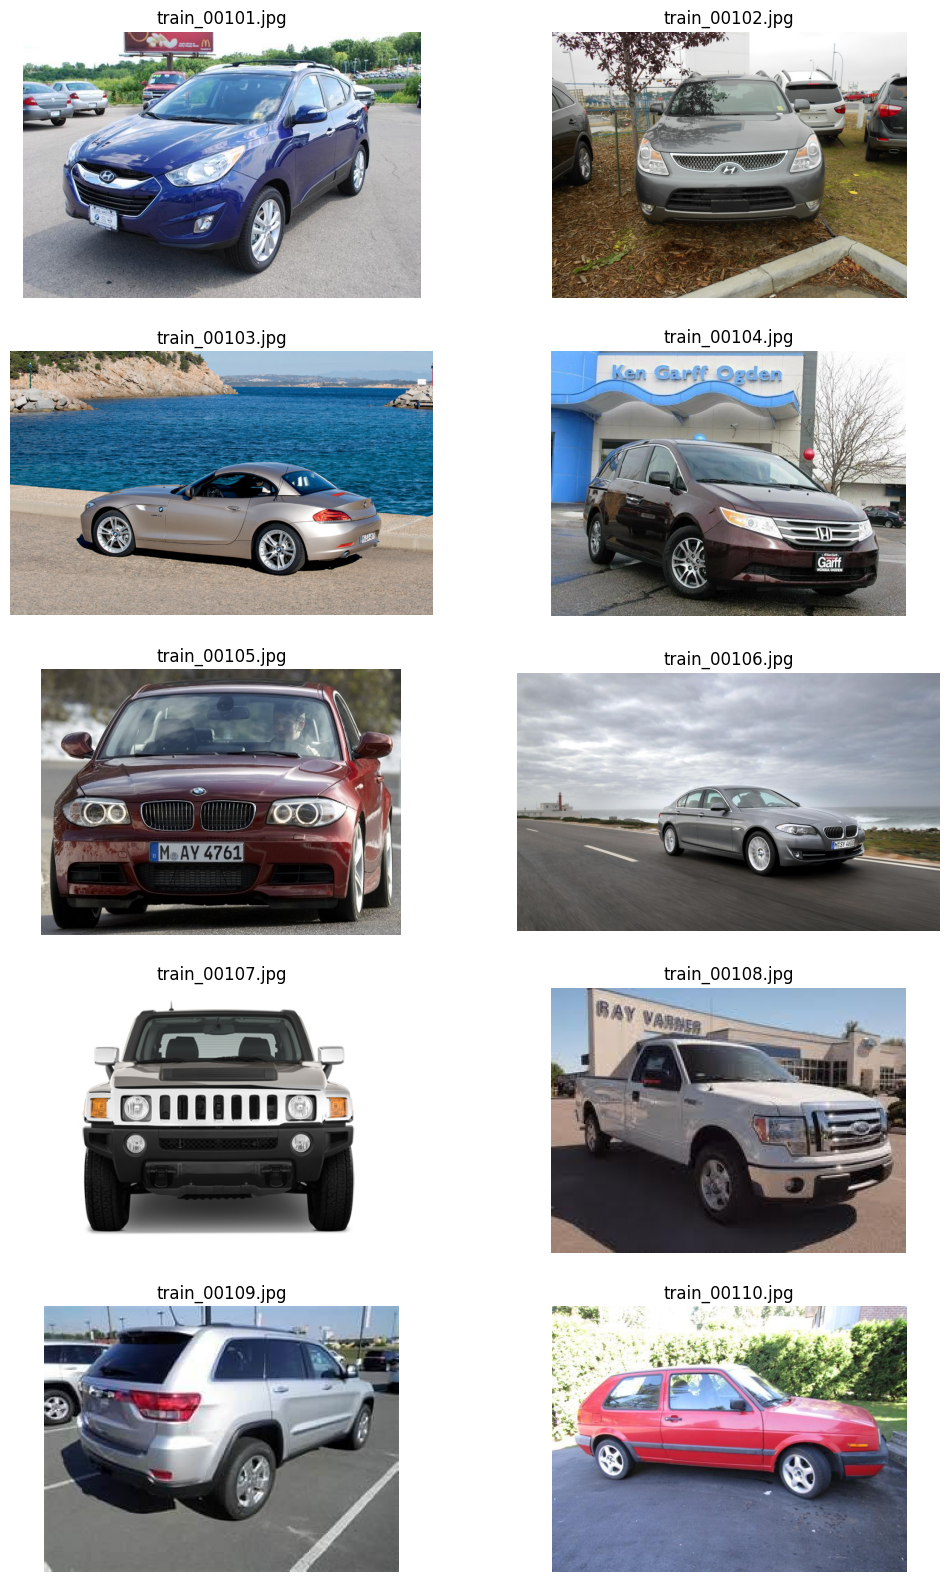

In [41]:
import PIL
from PIL import ImageDraw

tmp_imgs = df_train['img_file'][100:110]
plt.figure(figsize=(12,20))

for num, f_name in enumerate(tmp_imgs):
    img = PIL.Image.open(os.path.join(TRAIN_IMG_PATH, f_name))
    plt.subplot(5, 2, num + 1)
    plt.title(f_name)
    plt.imshow(img)
    plt.axis('off')

In [42]:
import cv2
folder_dir = DATA_PATH+'/train'

Total_img = []
for i in (os.listdir(folder_dir)):
    file_dir = folder_dir+'/'+i
    img = cv2.imread(file_dir, cv2.IMREAD_COLOR)
    img = cv2.resize(img, (224, 224))
    Total_img.append(img)

Total_img = np.array(Total_img)
print(Total_img.shape)

(2000, 224, 224, 3)


In [43]:
from sklearn.model_selection import train_test_split

df_train["class"] = df_train["class"].astype('str')
df_train = df_train[['img_file', 'class']]
X = Total_img
y = df_train['class']
y = pd.get_dummies(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.95, random_state=42)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(1900, 224, 224, 3) (1900, 196)
(100, 224, 224, 3) (100, 196)


## Github에서 코드 가져오기

In [44]:
!git clone https://github.com/kamwoh/Car-Model-Classification.git

Cloning into 'Car-Model-Classification'...
remote: Enumerating objects: 107, done.
remote: Counting objects: 100% (26/26), done.
remote: Compressing objects: 100% (24/24), done.
remote: Total 107 (delta 6), reused 9 (delta 1), pack-reused 81 (from 1)
Receiving objects: 100% (107/107), 167.83 MiB | 26.34 MiB/s, done.
Resolving deltas: 100% (37/37), done.
Updating files: 100% (23/23), done.


### Clone 경로를 확인하기
#### ls 명령어, cd 명령어

In [45]:
ls

Car-Model-Classification/  data/        imgs/  models/     prune.py      README.md  train.py
count_params.py            datasets.py  logs/  predict.py  __pycache__/  test.py


In [17]:
cd './Car-Model-Classification'

/content/Car-Model-Classification


In [18]:
ls

count_params.py  datasets.py  logs/    predict.py  README.md  train.py
data/            imgs/        models/  prune.py    test.py


### 평가하고자 하는 데이터 사용

In [56]:
folder_dir = DATA_PATH+'/train'

Total_img = []
for i in (os.listdir(folder_dir)):
    file_dir = folder_dir+'/'+i
    print(file_dir)

    !python predict.py --config logs/resnext50_400_60_v2/1/config.json --imgpath ../drive/MyDrive/강의및특강/2024_메디컬IoT/input/train/train_00954.jpg

    break

/content/drive/MyDrive/강의및특강/2024_메디컬IoT/input/train/train_00954.jpg
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNeXt50_32X4D_Weights.IMAGENET1K_V1`. You can also use `weights=ResNeXt50_32X4D_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
/content/Car-Model-Classification/test.py:130: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code duri

#### 정답 확인

In [61]:
df_train[df_train['img_file']=='train_00954.jpg']

,img_file,class
953,train_00954.jpg,29


In [64]:
df_class[df_class['id']==29]

,id,name
28,29,BMW 3 Series Sedan 2012


#### 진짜 정답

In [66]:
df_class[df_class['name']=='BMW 6 Series Convertible 2007']

,id,name
30,31,BMW 6 Series Convertible 2007
